In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [5]:
df = pd.read_csv("C:/Users/MANOEL/Downloads/AIML Dataset.csv")

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
#indiquons le nombre de fraudes et non fraudes présent dans le dataset

In [10]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
#nombre de fraudes signalés

In [12]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [13]:
df.shape[0]

6362620

In [14]:
#pourcentage de fraude par rapport au total de données
round(df["isFraud"].value_counts()[1] / df.shape[0] * 100,2)

np.float64(0.13)

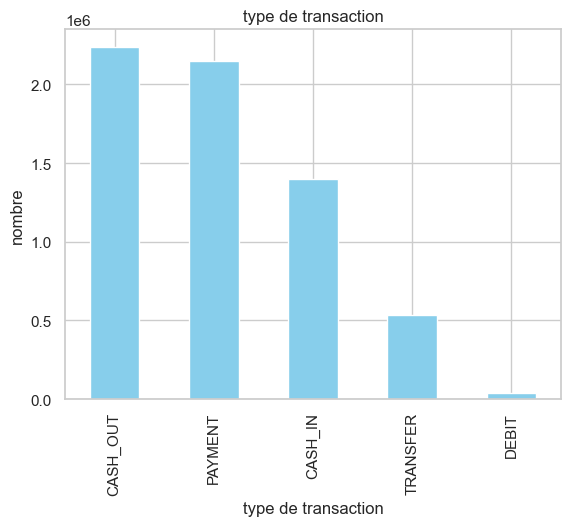

In [15]:
#type de transaction
df["type"].value_counts().plot(kind="bar",title="type de transaction",color="skyblue")
plt.xlabel("type de transaction")
plt.ylabel("nombre")
plt.show()

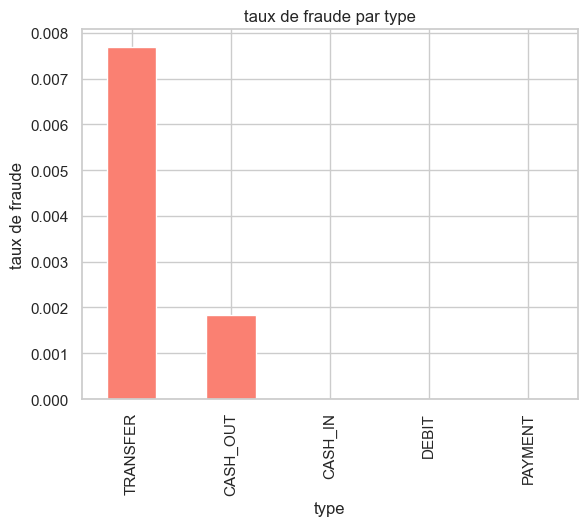

In [16]:
#taux de fraude par type
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="taux de fraude par type",color="salmon")
plt.ylabel("taux de fraude")
plt.show()

In [17]:
#statistique quantitative de la trame de données
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

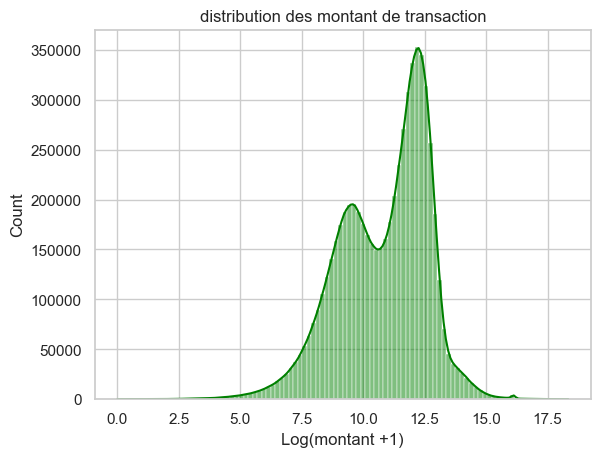

In [18]:
#log1p c'est pour avoir une histogramme plus lisse
sns.histplot(np.log1p(df["amount"]),bins=100, kde=True, color ="green")
plt.title("distribution des montant de transaction")
plt.xlabel("Log(montant +1)")
plt.show()

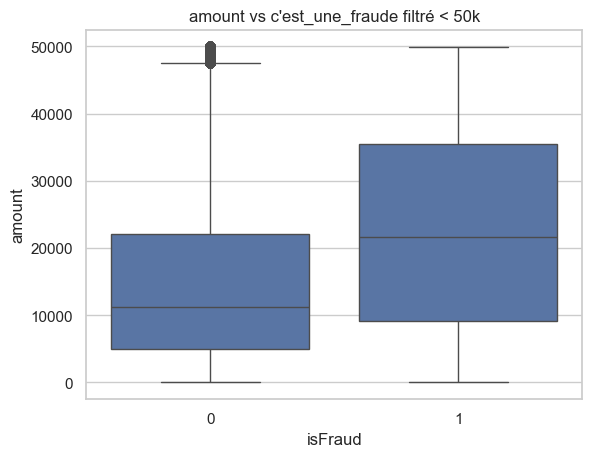

In [19]:
#relation entre fraude et montant
sns.boxplot(data=df[df['amount'] < 50000], x ="isFraud" ,y="amount")
plt.title("amount vs c'est_une_fraude filtré < 50k")
plt.show()


In [20]:
df["balanceDiffOrig"] = df['oldbalanceOrg'] - df['newbalanceOrig']
df["balanceDiffDest"] = df['newbalanceDest'] - df['oldbalanceDest']

In [21]:
#vérifier s'il y'a les valeurs négatives
(df['balanceDiffOrig']<0).sum()

np.int64(1399253)

In [22]:
#on constate des négatif du coté d'origine
(df['balanceDiffDest']<0).sum()

np.int64(1238864)

In [23]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


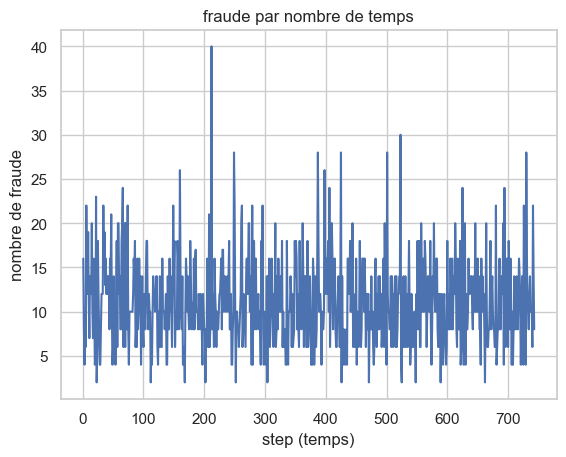

In [24]:
frauds_per_step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="frauds per step")
plt.xlabel("step (temps)")
plt.ylabel("nombre de fraude")
plt.title("fraude par nombre de temps")
plt.grid(True)
plt.show()

In [25]:
df.drop(columns="step", inplace=True)
#on constate qu'il ne depend pas du temps

In [26]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [27]:
top_senders = df["nameOrig"].value_counts().head(10)
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [28]:
top_receivers = df["nameDest"].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [29]:
#client fraudeurs
frauds_users = df[df['isFraud'] == 1]["nameOrig"].value_counts().head(10)
frauds_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [30]:
#transactions les plus frauduleuses
fraud_types = df[df['type'].isin(["TRANSFER","CASH_OUT"])]
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

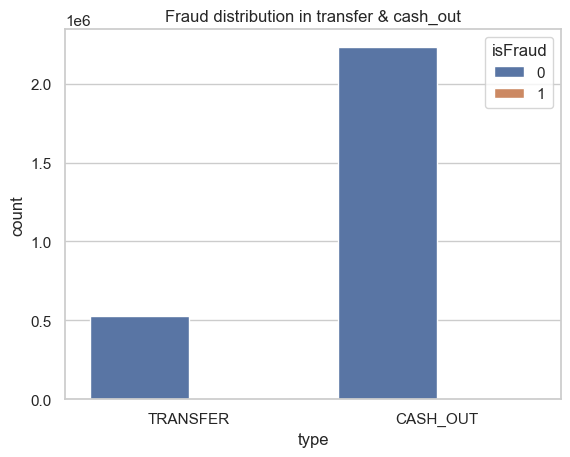

In [31]:
sns.countplot(data=fraud_types,x="type", hue="isFraud")
plt.title("Fraud distribution in transfer & cash_out")
plt.show()

In [32]:
#matrice de corrélation + filtrage des colonnes numériques
corr= df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


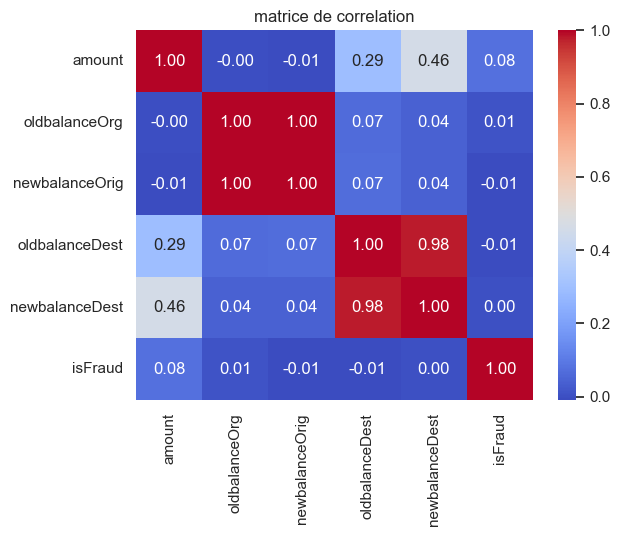

In [33]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("matrice de correlation")
plt.show()

In [34]:
#filtrage des clients après le transfert
zero_after_transfer = df[
(df['oldbalanceOrg']>0) &
(df['newbalanceOrig']==0)&
(df['type'].isin(["TRANSFER","CASH_OUT"]))
]
len(zero_after_transfer)

1188074

In [35]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [36]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [37]:
#on observe un désequilibre total maintenant selectionnons et préparons les fonctionnalités

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [39]:
#Ces lignes importent les outils de **scikit-learn** nécessaires pour :
#**séparer les données, normaliser, encoder, modéliser avec une régression logistique**, 
#et **évaluer les performances** via pipeline.

In [40]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis =1)
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [41]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [42]:
y=df_model["isFraud"]
X=df_model.drop("isFraud",axis = 1)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, stratify=y)

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num",StandardScaler(), numeric),
        ("cat",OneHotEncoder(drop="first"),categorical)
    ],
    remainder = "drop"
)

In [45]:
#pour l'apprentissage et la préparation
pipeline = Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced", max_iter=1000))
])
#gère le déséquilibre des classe

In [46]:
pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [47]:
y_pred = pipeline.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.94      0.97   1908786



In [49]:
#Classe 0 (majoritaire) :
#Précision parfaite (1.00) → le modèle identifie très bien les cas négatifs.
#Rappel élevé (0.95) → il trouve presque tous les vrais négatifs.
#f1-score (0.97) → excellent équilibre précision/rappel.
#Classe 1 (minoritaire) :
#Précision très faible (0.02) → beaucoup de faux positifs.
#Rappel élevé (0.94) → le modèle détecte presque tous les vrais positifs.
#f1-score très bas (0.04) → mauvais équilibre précision/rappel.

In [50]:
confusion_matrix(y_test,y_pred)

array([[1801349,  104973],
       [    136,    2328]])

In [51]:
#notre modèle détecte bien les fraudes mais la précision est moindre

In [52]:
pipeline.score(X_test,y_test)

0.9449341099526086

In [53]:
#exporte le pipeline
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']

In [312]:
#création de l'application steamlit